## Air BnB Data set
In this data set we intend to find the predicatable price based on various features which we will discuss as we go ahead. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

%matplotlib inline

## Data Collection

The data has been collected from the website insideairbnb.com.
The data represents the listings of Airbnb properties in Dublin, Leinster, Ireland. 
The data was compiled on 7th July 2021. 

In [2]:
df = pd.read_csv(r'C:\Users\Poojan Mahajan\Downloads\listings.csv')

In [3]:
pd.set_option('display.max_columns', None)
print(df.shape)
df.head()

(7740, 74)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20210707180351,2021-07-08,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",within a day,100%,40%,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,NaN,53.29178,-6.25792,Private room in bungalow,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Iron"", ""Wifi"", ""Fire extinguisher"", ""Hair dr...",$50.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,0,7,37,217,2021-07-08,227,0,0,2011-08-18,2020-02-08,4.77,4.82,4.72,4.92,4.92,4.66,4.82,NaN,f,3,0,3,0,1.88
1,85148,https://www.airbnb.com/rooms/85148,20210707180351,2021-07-08,Habitación en Dublín Double room,<b>The space</b><br />I'm renting a double roo...,NaN,https://a0.muscache.com/pictures/583752/61c664...,466111,https://www.airbnb.com/users/show/466111,Don,2011-03-27,"Dublin, Ireland",I am single and live alone here so when I'm ...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/466111/profil...,https://a0.muscache.com/im/users/466111/profil...,Templeogue,1.0,1.0,"['email', 'phone', 'reviews']",t,f,NaN,South Dublin,NaN,53.29885,-6.31850,Private room in house,Private room,2,NaN,NaN,1.0,1.0,"[""Essentials"", ""Heating"", ""Breakfast"", ""Cable ...",$30.00,1,5,1,1,5,5,1.0,5.0,NaN,t,0,0,9,284,2021-07-08,1,0,0,2019-05-11,2019-05-11,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,0.04
2,85156,https://www.airbnb.com/rooms/85156,20210707180351,2021-07-08,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",within a day,100%,40%,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,NaN,53.29209,-6.25624,Private room in bungalow,Private room,2,NaN,1.5 shared baths,1.0,1.0,"[""Iron"", ""Wifi"", ""Fire extinguisher"", ""Hair dr...",$63.00,3,14,3,3,14,14,3.0,14.0,NaN,t,0,7,37,312,2021-07-08,182,0,0,2014-11-24,2020-02-09,4.79,4.85,4.72,4.88,4.88,4.66,4.80,NaN,f,3,0,3,0,2.26
3,159889,https://www.airbnb.com/r

## Exploratory Data Analysis

#### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7740 entries, 0 to 7739
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7740 non-null   int64  
 1   listing_url                                   7740 non-null   object 
 2   scrape_id                                     7740 non-null   int64  
 3   last_scraped                                  7740 non-null   object 
 4   name                                          7739 non-null   object 
 5   description                                   7493 non-null   object 
 6   neighborhood_overview                         4299 non-null   object 
 7   picture_url                                   7740 non-null   object 
 8   host_id                                       7740 non-null   int64  
 9   host_url                                      7740 non-null   o

In [5]:
## convert price from object to Int
df.price = df.price.replace('\D', '', regex=True).astype(int)

In [6]:
df.price.dtypes

dtype('int32')

In [7]:
## Finding the columns which have more than 75% missing values. 
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])
most_missing_cols

{'bathrooms', 'calendar_updated', 'license', 'neighbourhood_group_cleansed'}

In [8]:
## Dropping these columns
df.drop(columns=['bathrooms', 'calendar_updated', 'license', 'neighbourhood_group_cleansed'], inplace=True)

In [9]:
## Dropping columns which are not required for our analysis
df.drop(columns=['id', 'listing_url', 'scrape_id', 'last_scraped', 'host_url', 'latitude', 'longitude', 
                      'bathrooms_text', 'host_thumbnail_url', 'picture_url', 'host_id', 'host_picture_url', 
                      'host_verifications', 'calendar_last_scraped','first_review', 'last_review'], inplace=True)

In [10]:
## Dropping the columns which are unrelated to our analysis
df.drop(columns=['neighborhood_overview', 'host_location','host_about', 'host_response_rate', 'host_acceptance_rate', 
                 'host_neighbourhood', 'neighbourhood','property_type', 'amenities'], inplace=True)

In [11]:
## Here we will check the percentage of nan values present in each feature

## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(),4),  ' % missing values')

description 0.0319  % missing values
host_name 0.0429  % missing values
host_since 0.0429  % missing values
host_response_time 0.6389  % missing values
host_is_superhost 0.0429  % missing values
host_listings_count 0.0429  % missing values
host_total_listings_count 0.0429  % missing values
host_has_profile_pic 0.0429  % missing values
host_identity_verified 0.0429  % missing values
bedrooms 0.0386  % missing values
beds 0.0094  % missing values
review_scores_rating 0.2451  % missing values
review_scores_accuracy 0.2669  % missing values
review_scores_cleanliness 0.2668  % missing values
review_scores_checkin 0.2677  % missing values
review_scores_communication 0.2669  % missing values
review_scores_location 0.2677  % missing values
review_scores_value 0.268  % missing values
reviews_per_month 0.2451  % missing values


### Since they are many missing values, we need to find the relationship between missing values and Price

Let's plot some diagram for this relationship


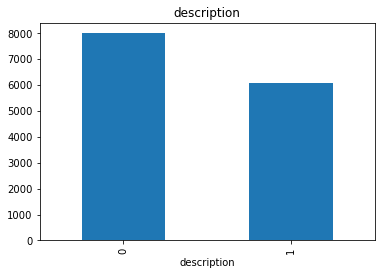

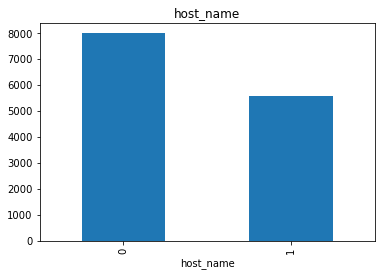

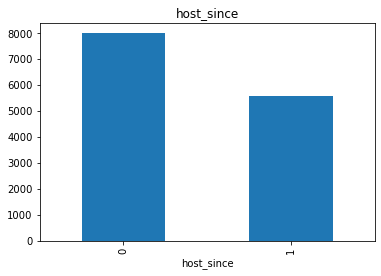

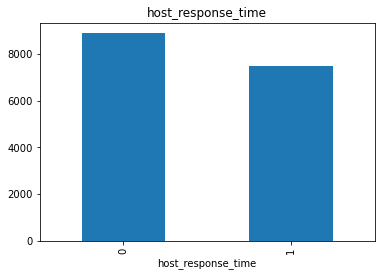

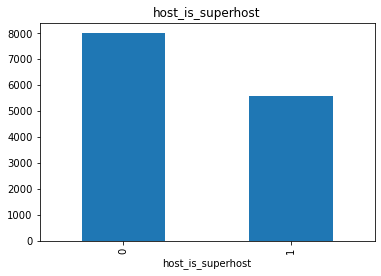

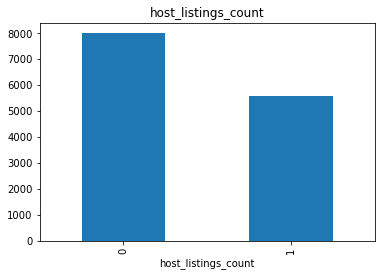

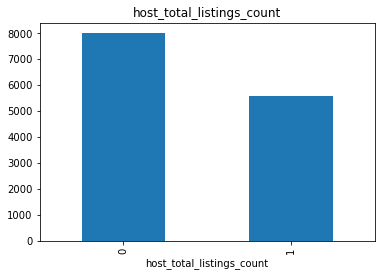

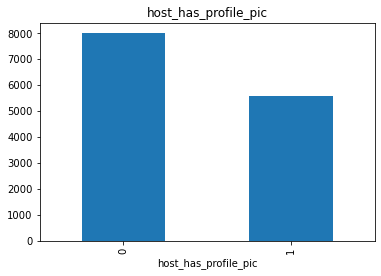

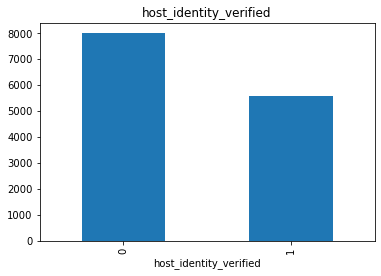

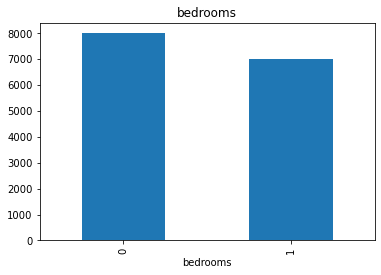

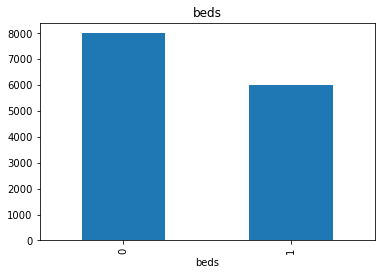

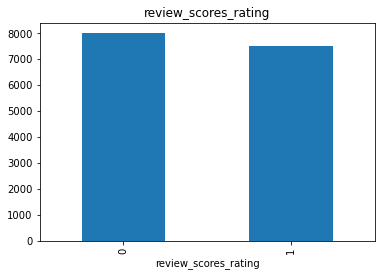

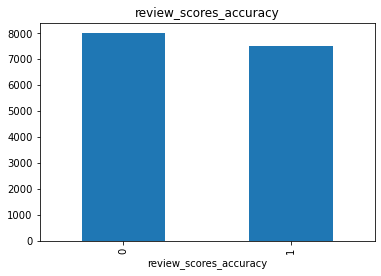

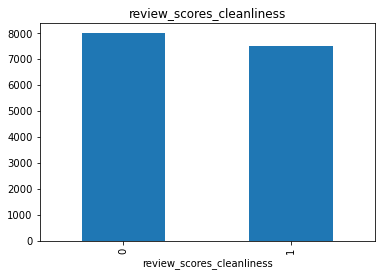

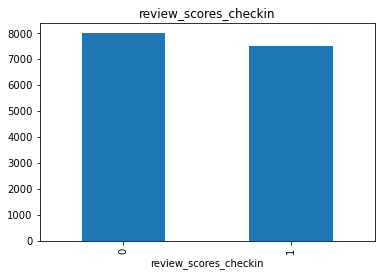

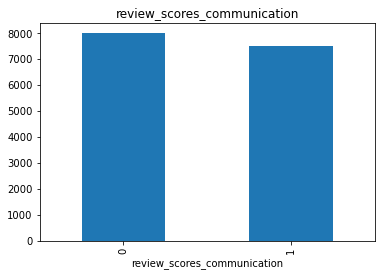

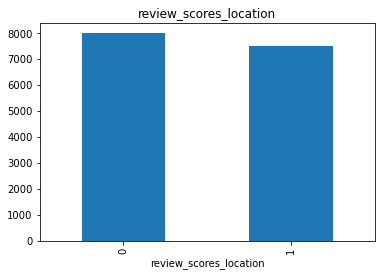

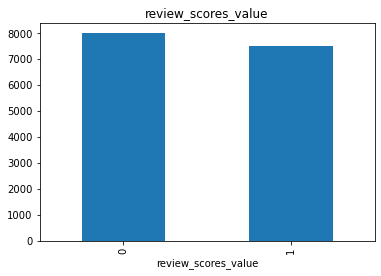

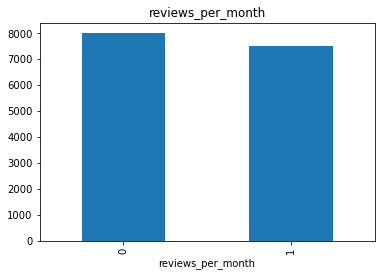

In [12]:
for feature in features_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(df[feature].isnull(), 1, 0)
    
    # let's calculate the mean price where the information is missing or present
    data.groupby(feature)['price'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

From the above dataset some of the features like Ids is not required

In [13]:
## Description, host_name only has one unique value, therefore we will drop it. 
## Name is not required.
df.drop(columns=['description', 'name', 'host_name'], inplace=True)

### Objects

In [14]:
objects = [feature for feature in df.columns if df[feature].dtypes == 'O']
objects

print('Number of objects: ', len(objects))

# visualise the objects
df[objects].head()

Number of objects:  9


,host_since,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,has_availability,instant_bookable
0,2010-08-06,within a day,t,t,t,Dn Laoghaire-Rathdown,Private room,t,f
1,2011-03-27,NaN,f,t,f,South Dublin,Private room,t,f
2,2010-08-06,within a day,t,t,t,Dn Laoghaire-Rathdown,Private room,t,f
3,2011-07-01,NaN,f,t,t,Dublin City,Private room,t,f
4,2011-07-04,within a few hours,t,t,t,Dn Laoghaire-Rathdown,Private room,t,f


In [15]:
## Numerical Variables

In [16]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  33


,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3.0,3.0,2,1.0,2.0,5000,3,1125,3,3,1125,1125,3.0,1125.0,0,7,37,217,227,0,0,4.77,4.82,4.72,4.92,4.92,4.66,4.82,3,0,3,0,1.88
1,1.0,1.0,2,1.0,1.0,3000,1,5,1,1,5,5,1.0,5.0,0,0,9,284,1,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0.04
2,3.0,3.0,2,1.0,1.0,6300,3,14,3,3,14,14,3.0,14.0,0,7,37,312,182,0,0,4.79,4.85,4.72,4.88,4.88,4.66,4.80,3,0,3,0,2.26
3,0.0,0.0,1,3.0,6.0,3800,2,28,2,2,28,28,2.0,28.0,9,39,69,344,311,0,0,4.75,4.77,4.73,4.85,4.90,4.62,4.74,3,0,3,0,3.58
4,2.0,2.0,6,2.0,4.0,6500,1,12,1,1,12,12,1.0,12.0,0,0,17,286,284,0,0,4.83,4.87,4.84,4.94,4.96,4.77,4.85,2,0,2,0,3.90


In [17]:
df[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7740 entries, 0 to 7739
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_listings_count                           7408 non-null   float64
 1   host_total_listings_count                     7408 non-null   float64
 2   accommodates                                  7740 non-null   int64  
 3   bedrooms                                      7441 non-null   float64
 4   beds                                          7667 non-null   float64
 5   price                                         7740 non-null   int32  
 6   minimum_nights                                7740 non-null   int64  
 7   maximum_nights                                7740 non-null   int64  
 8   minimum_minimum_nights                        7740 non-null   int64  
 9   maximum_minimum_nights                        7740 non-null   i

In [18]:
# list of variables that contain year information
host_since = [feature for feature in numerical_features if 'host' in feature or 'since' in feature]

host_since

['host_listings_count',
 'host_total_listings_count',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms']

In [19]:
# let's explore the content of these year variables
for feature in host_since:
    print(feature, df[feature].unique())

host_listings_count [3.000e+00 1.000e+00 0.000e+00 2.000e+00 5.000e+00 8.000e+00 4.000e+00
 1.200e+01 2.100e+01       nan 1.500e+01 7.000e+00 6.000e+00 9.000e+00
 2.700e+01 1.900e+01 2.500e+01 1.100e+01 2.200e+01 1.000e+01 1.400e+01
 2.000e+01 1.600e+01 2.900e+01 3.100e+01 1.700e+01 1.300e+01 2.800e+01
 1.070e+02 5.200e+01 6.900e+01 2.270e+02 1.917e+03 2.300e+01 3.610e+02]
host_total_listings_count [3.000e+00 1.000e+00 0.000e+00 2.000e+00 5.000e+00 8.000e+00 4.000e+00
 1.200e+01 2.100e+01       nan 1.500e+01 7.000e+00 6.000e+00 9.000e+00
 2.700e+01 1.900e+01 2.500e+01 1.100e+01 2.200e+01 1.000e+01 1.400e+01
 2.000e+01 1.600e+01 2.900e+01 3.100e+01 1.700e+01 1.300e+01 2.800e+01
 1.070e+02 5.200e+01 6.900e+01 2.270e+02 1.917e+03 2.300e+01 3.610e+02]
calculated_host_listings_count [  3   1   2   5   8  10   4  32  21   7   6  15  26  14   9  11  43  12
  20  13  40  42  18  24  16 315  34]
calculated_host_listings_count_entire_homes [ 0  5  1  3  8  2 10 31 21 13  4  6 23 14 11 42 12 25  

Text(0.5, 1.0, 'host since vs price')

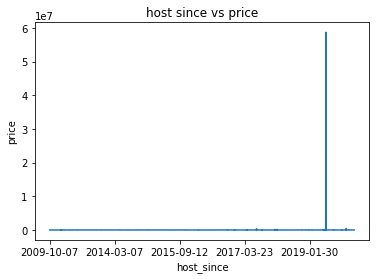

In [20]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between host joined Airbnb and the price

df.groupby('host_since')['price'].median().plot()
plt.xlabel('host_since')
plt.ylabel('price')
plt.title("host since vs price")

In [21]:
## As we see that the price is not affected by the time host joined Airbnb therefore we will drop host_since
df.drop(columns=['host_since'], inplace=True)

In [22]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 7


['accommodates',
 'bedrooms',
 'beds',
 'number_of_reviews_l30d',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms']

In [23]:
df[discrete_feature].head()

,accommodates,bedrooms,beds,number_of_reviews_l30d,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2,1.0,2.0,0,0,3,0
1,2,1.0,1.0,0,0,1,0
2,2,1.0,1.0,0,0,3,0
3,1,3.0,6.0,0,0,3,0
4,6,2.0,4.0,0,0,2,0


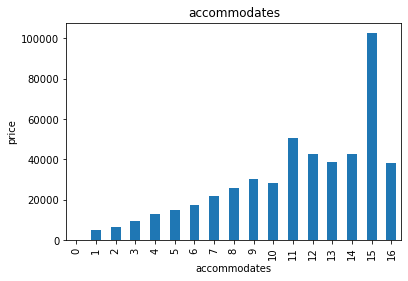

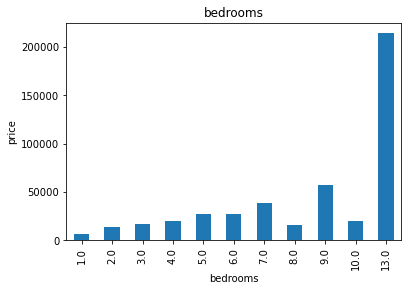

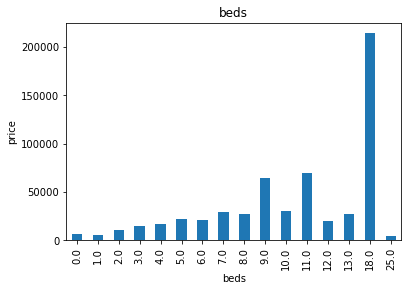

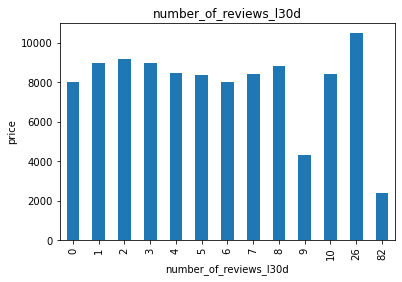

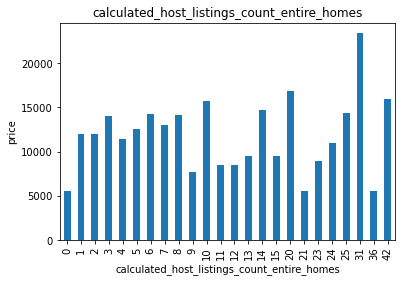

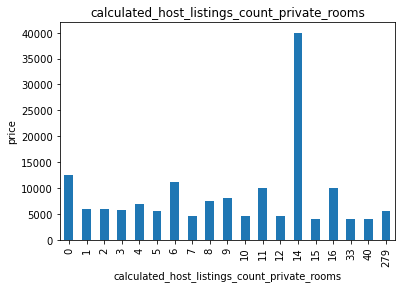

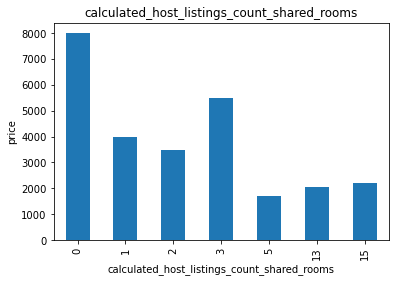

In [24]:
## Lets Find the realtionship between them and price

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

In [25]:
#### Continuous Variable
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 26


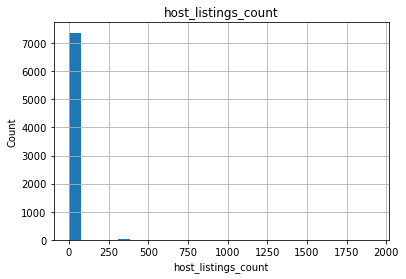

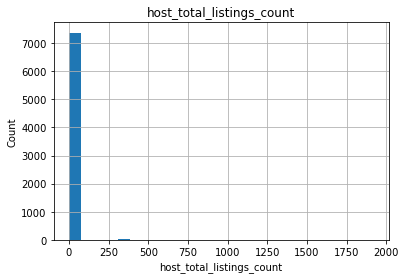

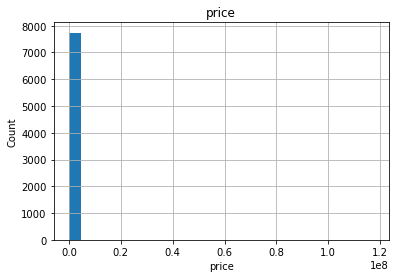

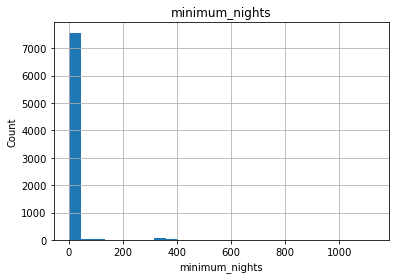

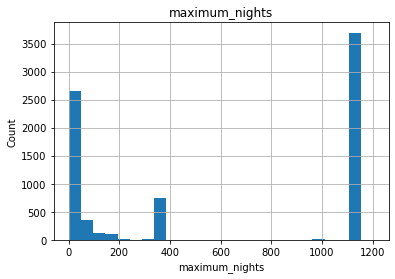

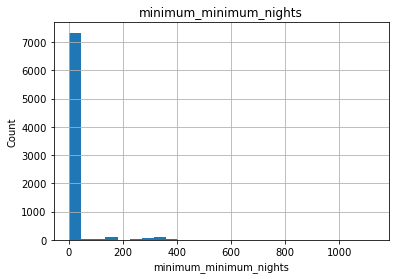

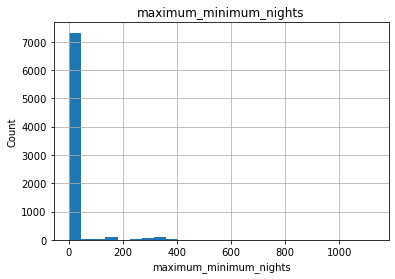

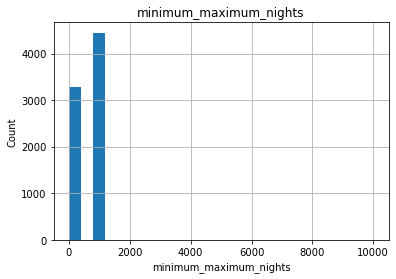

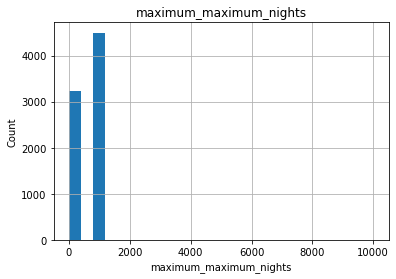

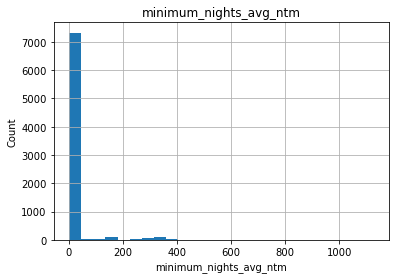

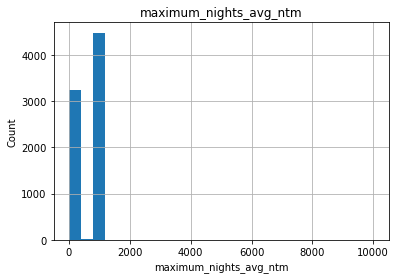

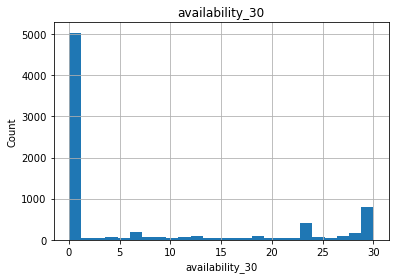

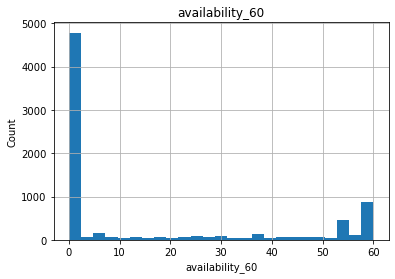

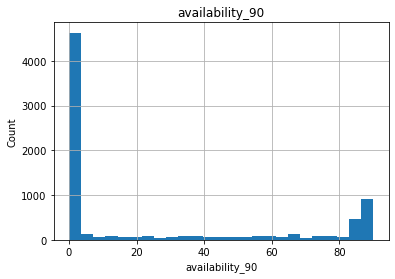

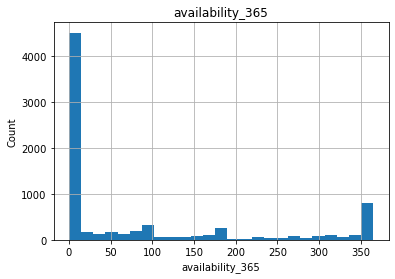

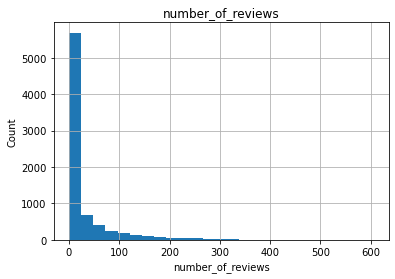

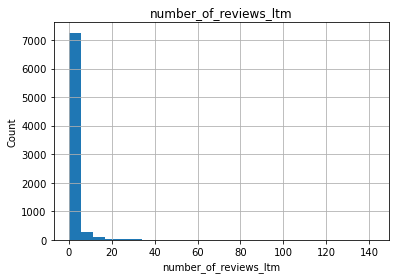

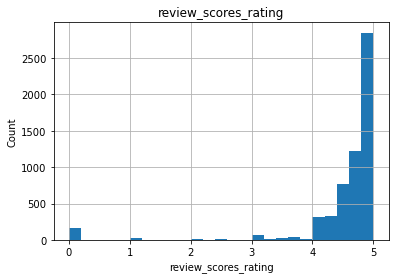

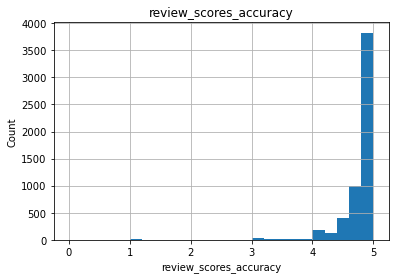

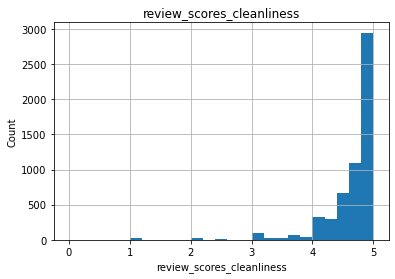

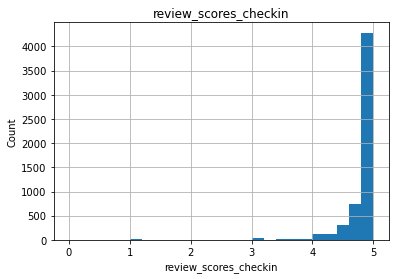

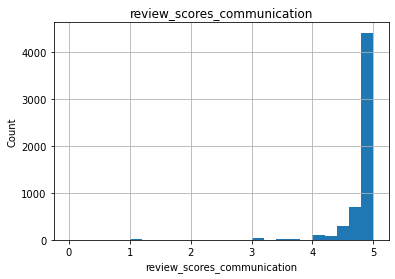

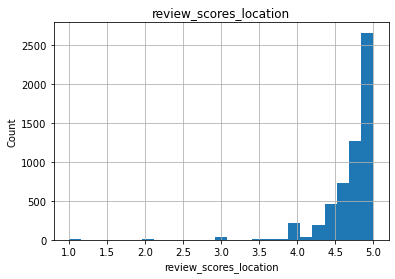

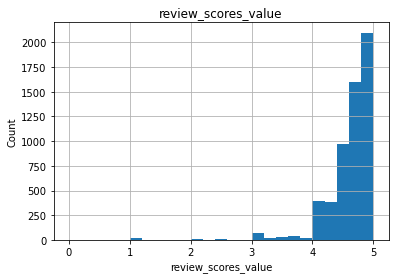

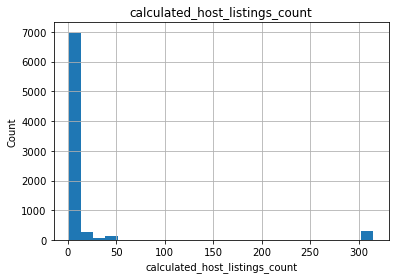

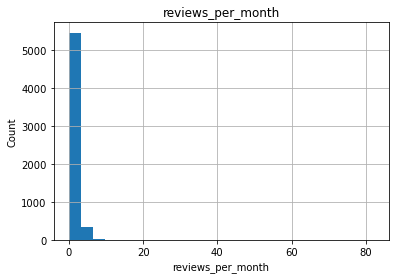

In [26]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## Exploratory Data Analysis Part-2 

C:\Users\Poojan Mahajan\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


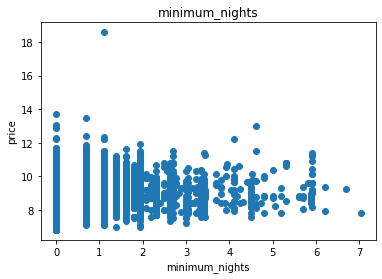

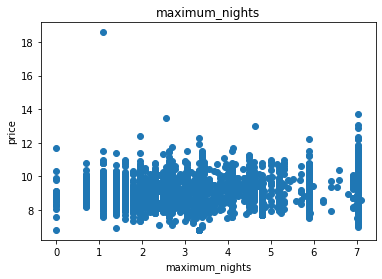

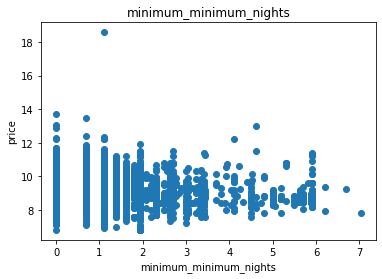

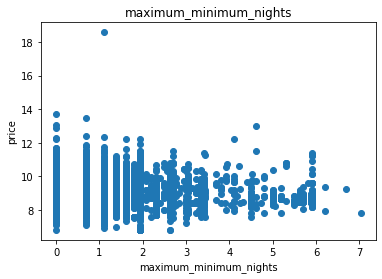

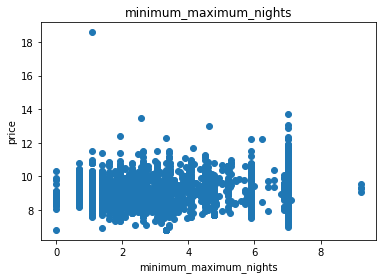

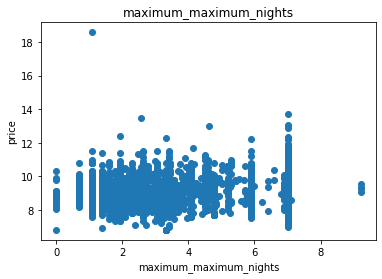

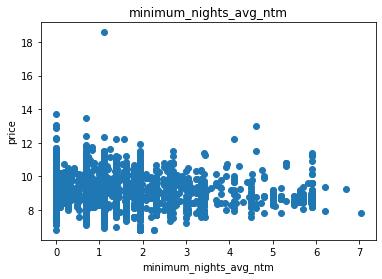

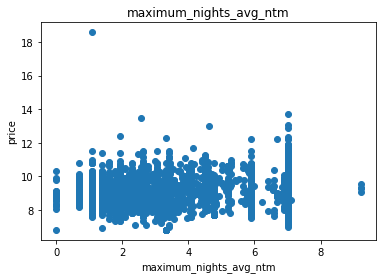

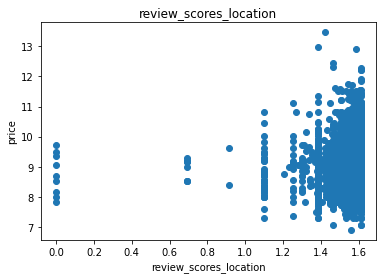

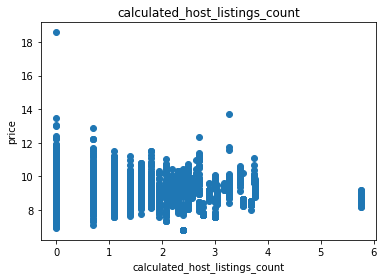

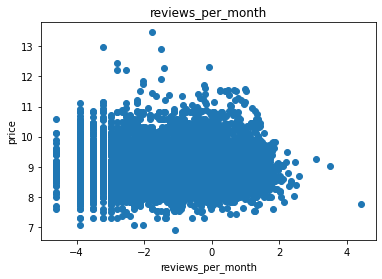

In [27]:
## We will be using logarithmic transformation

for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['price']=np.log(data['price'])
        plt.scatter(data[feature],data['price'])
        plt.xlabel(feature)
        plt.ylabel('price')
        plt.title(feature)
        plt.show()
        
    

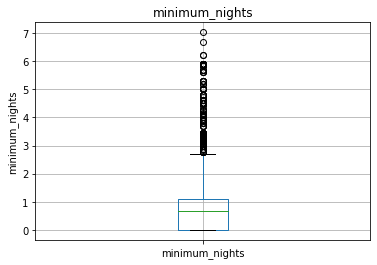

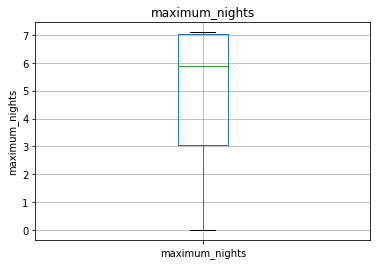

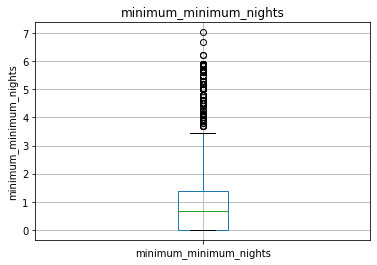

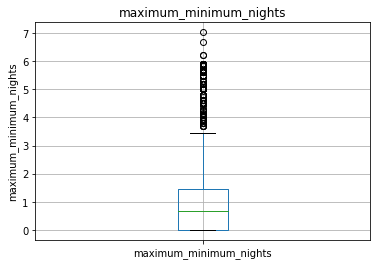

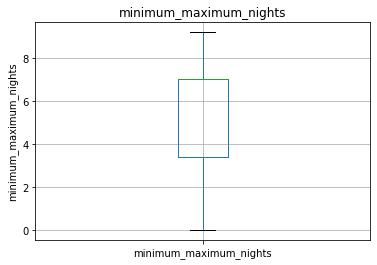

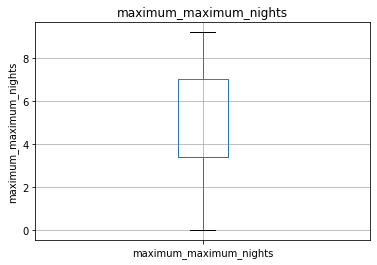

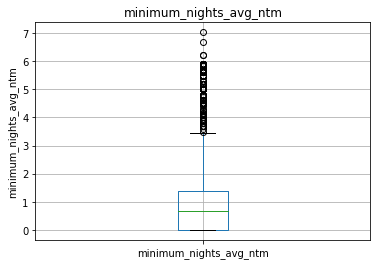

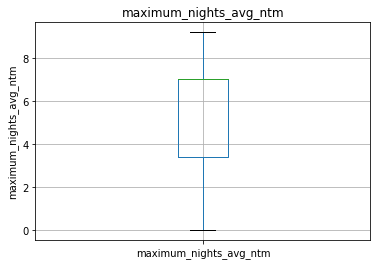

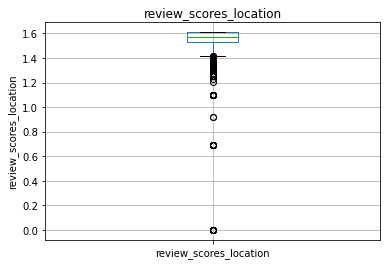

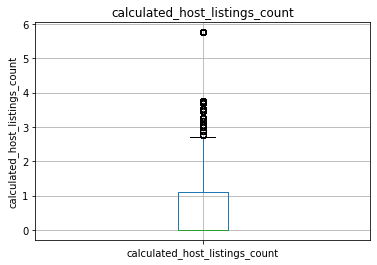

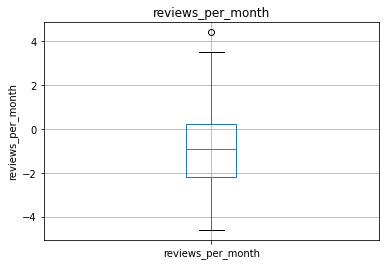

In [28]:
## Outliers
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [29]:
## Categorical Variables

categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['host_response_time',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'room_type',
 'has_availability',
 'instant_bookable']

In [30]:
df[categorical_features].head()

,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,has_availability,instant_bookable
0,within a day,t,t,t,Dn Laoghaire-Rathdown,Private room,t,f
1,NaN,f,t,f,South Dublin,Private room,t,f
2,within a day,t,t,t,Dn Laoghaire-Rathdown,Private room,t,f
3,NaN,f,t,t,Dublin City,Private room,t,f
4,within a few hours,t,t,t,Dn Laoghaire-Rathdown,Private room,t,f


In [31]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is host_response_time and number of categories are 5
The feature is host_is_superhost and number of categories are 3
The feature is host_has_profile_pic and number of categories are 3
The feature is host_identity_verified and number of categories are 3
The feature is neighbourhood_cleansed and number of categories are 4
The feature is room_type and number of categories are 4
The feature is has_availability and number of categories are 2
The feature is instant_bookable and number of categories are 2


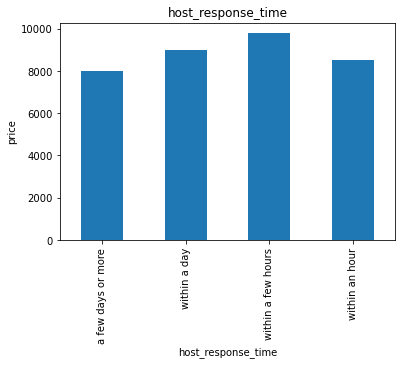

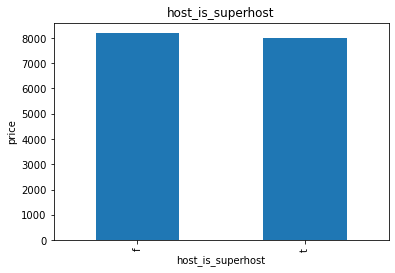

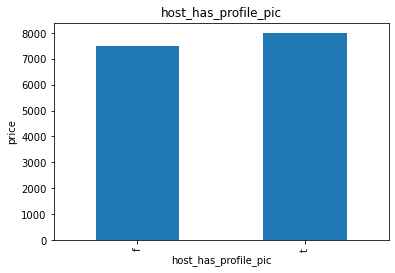

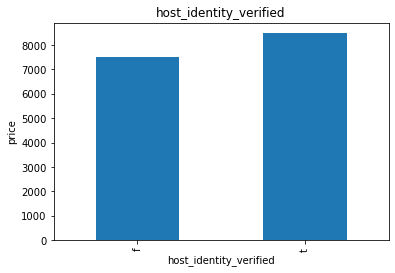

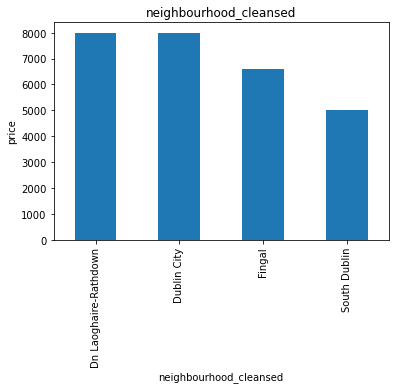

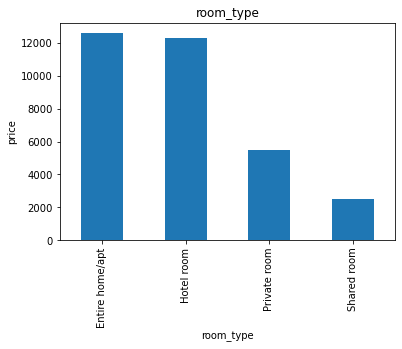

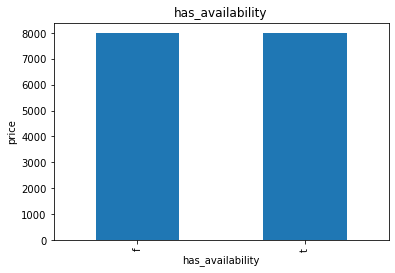

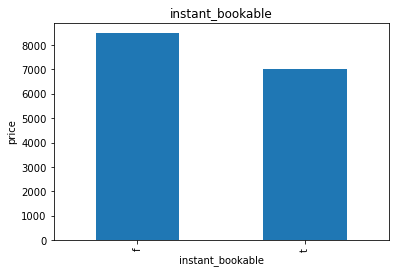

In [32]:
## Find out the relationship between categorical variable and dependent feature price
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()